### Configuration

In [1]:
args = {
  'top': 10,
  'country': 'united_states'
}

### Libraries

In [2]:
import pandas as pd
import utils.file as File
import utils.visualiser as Visualiser

def get_country_year_count(firms):
  return firms.groupby(['Founded Year']).size()

def get_tag_group_count(firms):
  tag_group_count = {}

  for tag_groups in firms['Tag Groups']:
    for tag_group in tag_groups:
        tag_group_count[tag_group] = tag_group_count.get(tag_group, 0) + 1
  
  return pd.Series(tag_group_count).sort_values(ascending=False)

def get_tag_group_tag_count(firms, tag_group):
  tag_group_firms = firms[firms['Tag Groups'].apply(lambda x: tag_group in x)]
  tag_count = {}

  for tags in tag_group_firms['Tags']:
    for tag in tags:
      if tag != tag_group:
        tag_count[tag] = tag_count.get(tag, 0) + 1
  
  return pd.Series(tag_count).sort_values(ascending=False)

### Run

In [3]:
# Read Data
firms = File.read_pickle(f"{args['country']}_firms")
real_gdp = File.read_pickle('real_gdp')
fed_rate = File.read_pickle('fed_rate')

In [4]:
# Filter data
firms = firms[firms['Company Type'] == 'For Profit']
firms = firms[pd.notna(firms['Founded Year'])]
firms = firms[firms['Founded Year'] > 1950]
firms = firms[firms['Founded Year'] <= 2020]
firms = firms.reset_index(drop=True)

In [8]:
country_year_count = get_country_year_count(firms)

Founded Year
1951.0     1411
1952.0     1999
1953.0     1864
1954.0     2163
1955.0     2044
          ...  
2016.0    31759
2017.0    31306
2018.0    27988
2019.0    23388
2020.0    21723
Length: 70, dtype: int64
      Fed Rate
Year          
1954  1.180000
1955  1.876667
1956  2.786667
1957  3.110000
1958  1.157500
...        ...
2020  0.331667
2021  0.065000
2022  1.850000
2023  5.058333
2024  5.330000

[71 rows x 1 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


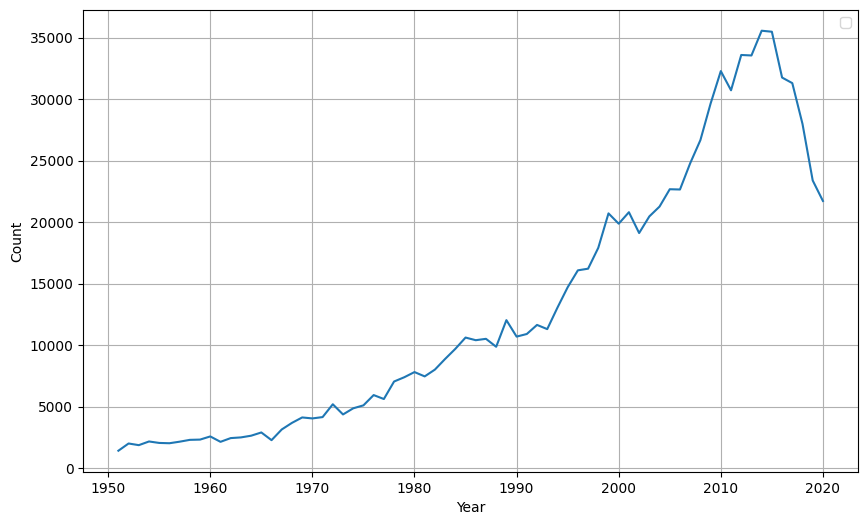

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


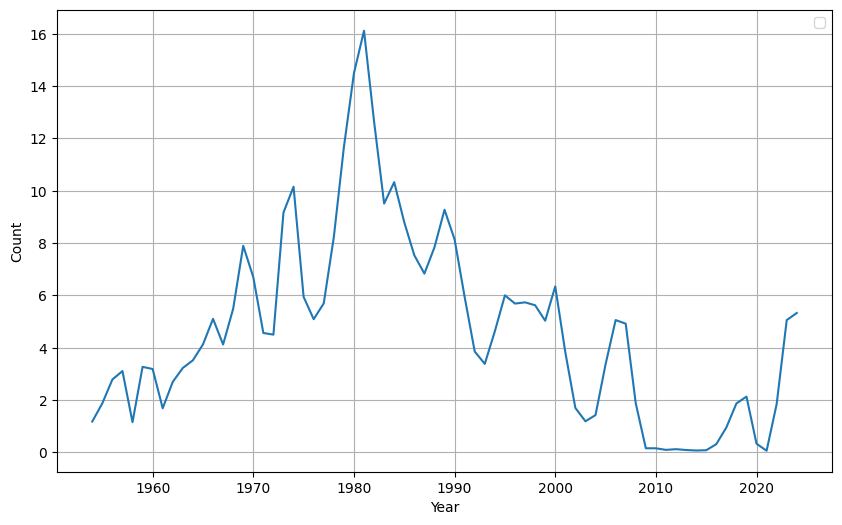

In [9]:
Visualiser.plot(country_year_count)
Visualiser.show()

Visualiser.plot(fed_rate)
Visualiser.show()

Visualiser.log_regression(country_year_count, fed_rate)
Visualiser.show()

In [11]:
country_tag_group_count = get_tag_group_count(firms)
software_tag_count = get_tag_group_tag_count(firms, 'Software')
infotech_tag_count = get_tag_group_tag_count(firms, 'Information Technology')


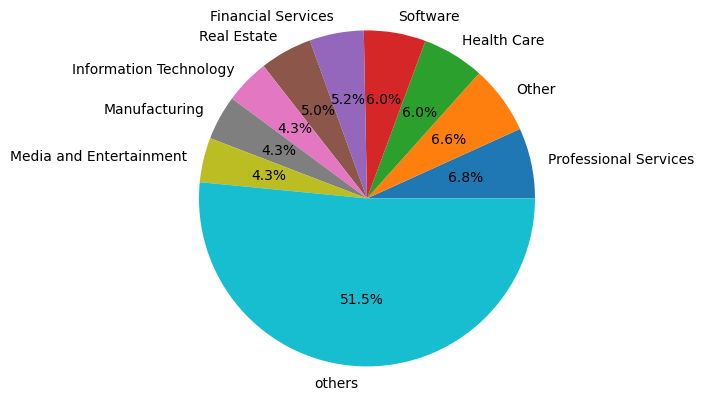

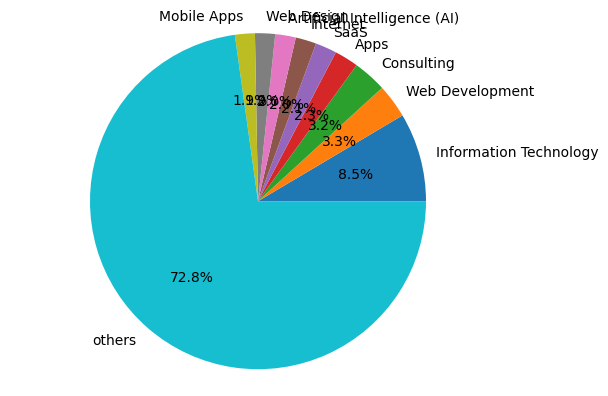

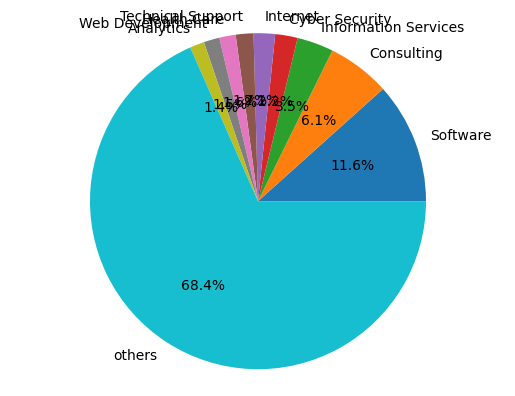

In [20]:
Visualiser.pie(country_tag_group_count)
Visualiser.show()

Visualiser.pie(software_tag_count)
Visualiser.show()

Visualiser.pie(infotech_tag_count)
Visualiser.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


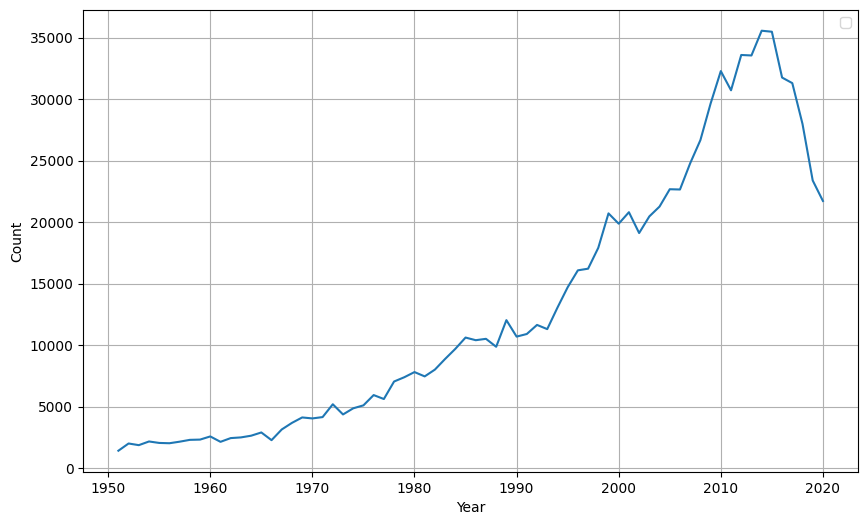

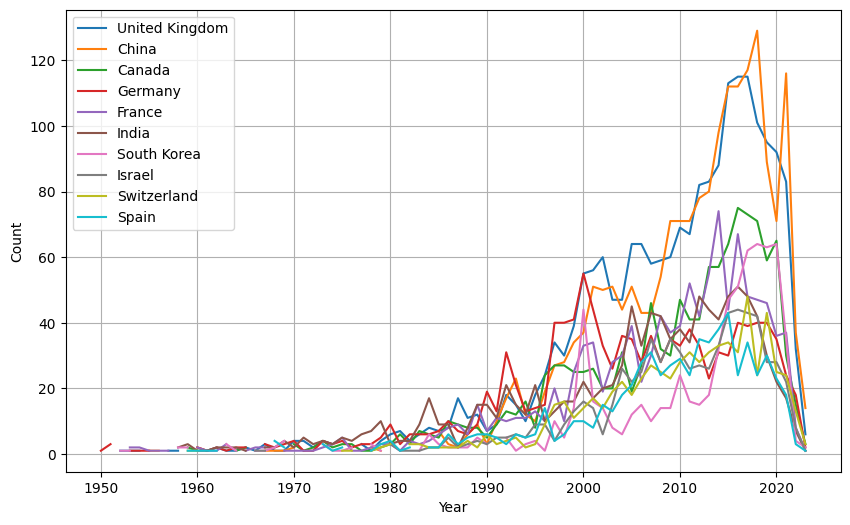

In [ ]:
Visualiser.plot_(top_country_year_count_excl_us)
Visualiser.show()

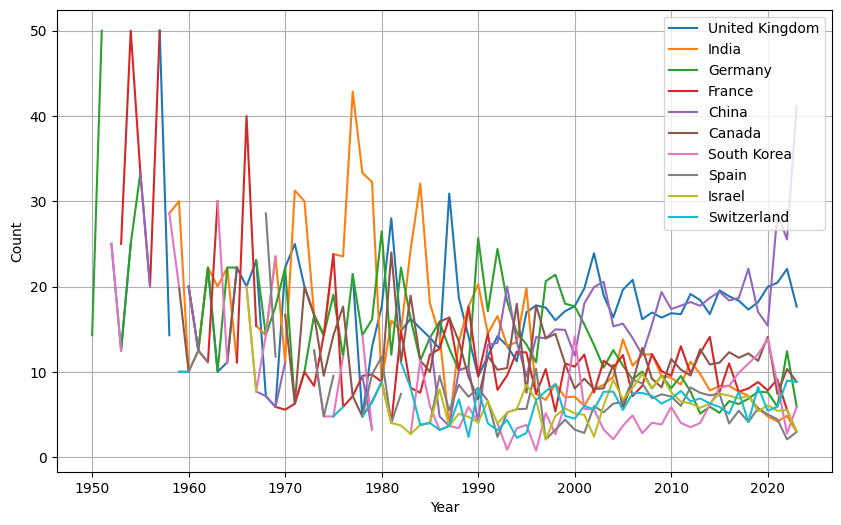

In [ ]:
Visualiser.plot_(top_country_year_percent_excl_us)
Visualiser.show()

In [ ]:
list = [21, 15, 10, 7, 7, 8, 5, 32, 31,  13, 21, 19, 31, 15, 23, 19, 9, 50, 32, 13, 9, 54, 43, 43, 38, 15, 13, 62, 9, 10, 12, 13, 6, 41, 10, 17, 15, 23, 33,  37, 28, 8, 93, 30, 23, 33, 16, 12]
sum(list)

1127